In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
# %matplotlib widget

def get_file_path(isotope: str, temp: float | str, ch: int, hv: int, dir: str):
    temp_str = temp if isinstance(temp, str) else f'{int(temp)}'
    return f"../data/{dir}/{isotope}/t_{temp_str}/ch_{ch}/hv_{hv}.csv"

def load_spec(isotope: str, temp: float, ch: int, hv: int, dir: str) -> np.ndarray:
    filepath = get_file_path(isotope, temp, ch, hv, dir)
    df = pd.read_csv(filepath)
    
    df = pd.read_csv(filepath)
    exp_times = df.values[:, 0]
    total_exposure = np.sum(exp_times)
    spec_exposures = df.values[:, 4:]
    spec = np.sum(spec_exposures * np.tile(exp_times, (spec_exposures.shape[1], 1)).T, axis=0) / total_exposure
    return spec

def load_partial_specs(isotope: str, temp: float, ch: int, hv: int, dir: str) -> np.ndarray:
    filepath = get_file_path(isotope, temp, ch, hv, dir)
    df = pd.read_csv(filepath)
    total_exposure = np.sum(df.values[:, 0])
    spec_exposures = df.values[:, 4:]
    return spec_exposures

channels = np.arange(0, 256)

ch0: k = 0.06121 ± 0.00022, c = 48.775 ± 0.031
ch1: k = 0.06062 ± 0.00021, c = 48.462 ± 0.029


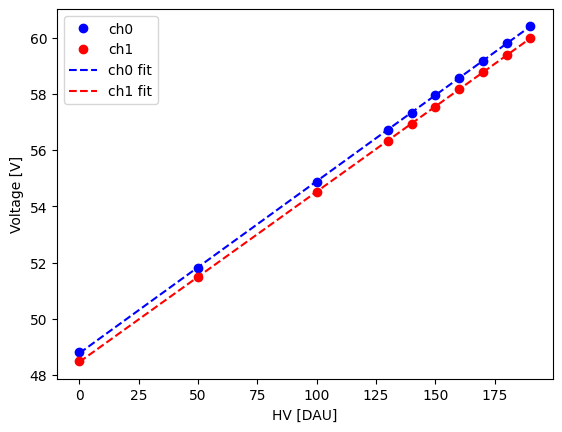

In [2]:
calib_df = pd.read_csv('../data/hv_calib.csv')
daus = calib_df.values[:, 0]
u_ch0 = calib_df.values[:, 1]
u_ch1 = calib_df.values[:, 2]

fit_ch0, cov_ch0 = np.polyfit(daus, u_ch0, 1, cov=True)
fit_ch1, cov_ch1 = np.polyfit(daus, u_ch1, 1, cov=True)
k0 = fit_ch0[0]
k1 = fit_ch1[0]
c0 = fit_ch0[1]
c1 = fit_ch1[1]
k0_err = np.sqrt(cov_ch0[0, 0])
k1_err = np.sqrt(cov_ch1[0, 0])
c0_err = np.sqrt(cov_ch0[1, 1])
c1_err = np.sqrt(cov_ch1[1, 1])

print(f'ch0: k = {k0:.5f} ± {k0_err*2:.5f}, c = {c0:.3f} ± {c0_err*2:.3f}')
print(f'ch1: k = {k1:.5f} ± {k1_err*2:.5f}, c = {c1:.3f} ± {c1_err*2:.3f}')

model_daus = np.linspace(0, 190, 100)
model_u_ch0 = model_daus * fit_ch0[0] + fit_ch0[1]
model_u_ch1 = model_daus * fit_ch1[0] + fit_ch1[1]

plt.figure()
plt.plot(daus, u_ch0, 'o', color='blue', label='ch0')
plt.plot(daus, u_ch1, 'o', color='red', label='ch1')
plt.plot(model_daus, model_u_ch0, '--', color='blue', label='ch0 fit')
plt.plot(model_daus, model_u_ch1, '--', color='red', label='ch1 fit')
plt.legend()
plt.xlabel('HV [DAU]')
plt.ylabel('Voltage [V]')
plt.savefig('../outputs/hv-voltage-calib.pdf')
plt.show()